In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils

display = utils.notebook_init()  # checks

from IPython. display import Image, clear_output # to display images

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
!pip install roboflow
import os
from roboflow import Roboflow

api_key = "bnMyWHZZtfUGoOMVhl5s"

rf = Roboflow(api_key=api_key, model_format="yolov5", notebook="ultralytics")

os.environ["DATASET_DIRECTORY"] = "/content/datasets"
project = rf.workspace("dataset1-30sfw").project("arucocodedetection2")
version = project.version(1)
dataset2 = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!python yolov5/train.py --img 640 --batch 16 --epochs 20 --data /content/datasets/ArucoCodeDetection2-1//data.yaml --weights yolov5s.pt


2024-03-12 04:48:56.079085: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 04:48:56.079145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 04:48:56.080588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/datasets/ArucoCodeDetection2-1//data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=Fal

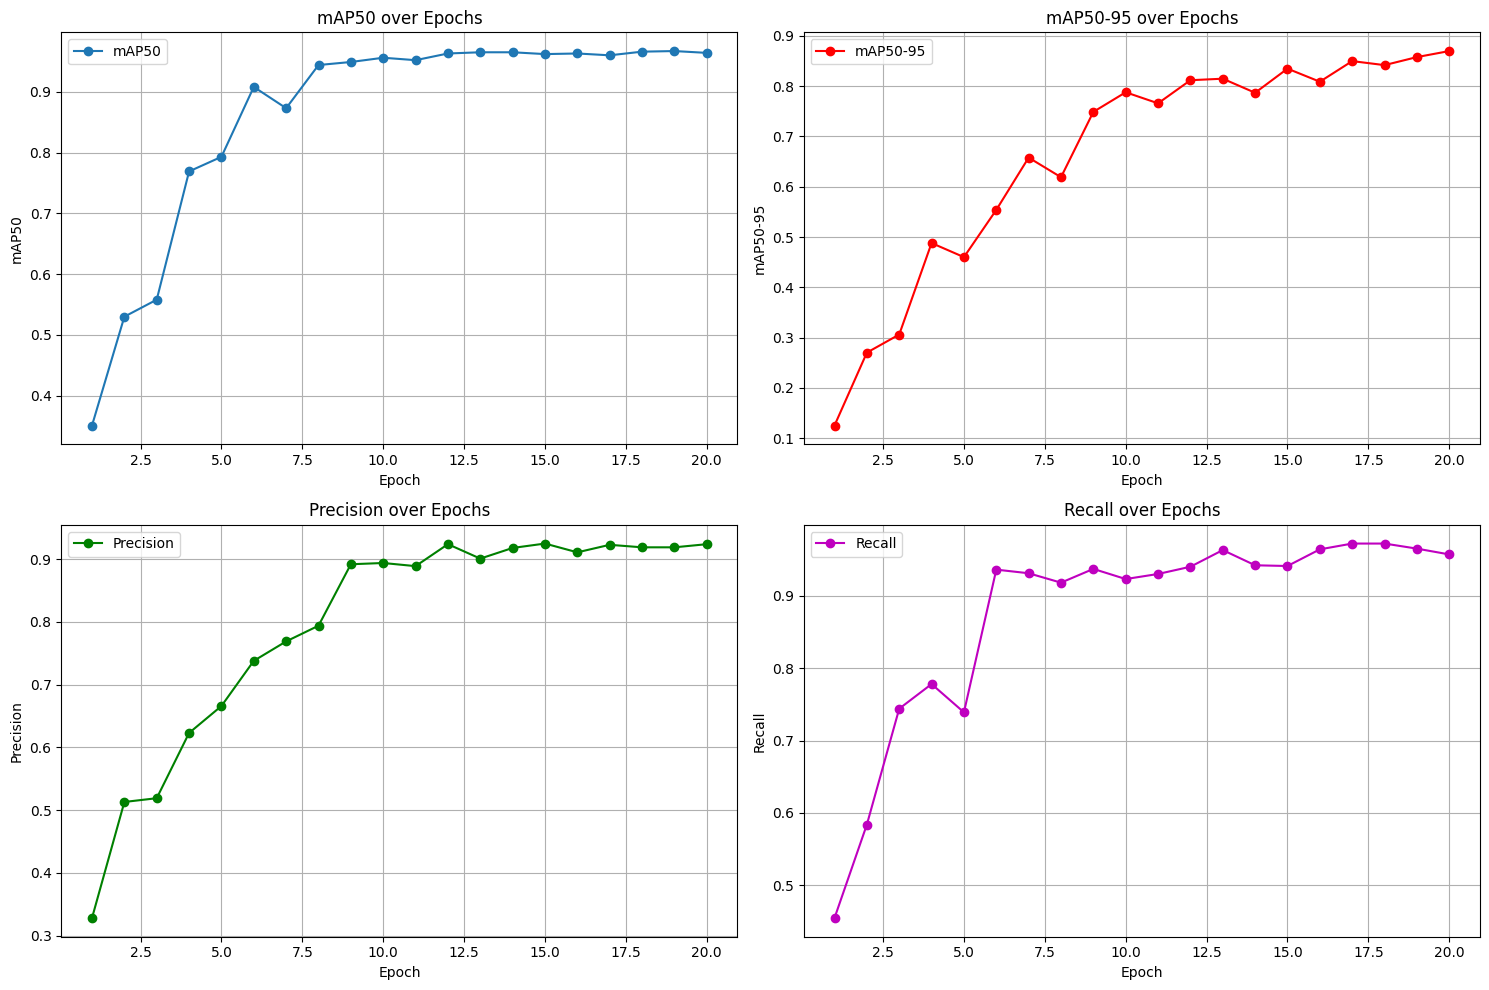

In [ ]:
import matplotlib.pyplot as plt

# Data from the training process
epochs = list(range(1, 21))
mAP50 = [0.351, 0.53, 0.558, 0.769, 0.793, 0.908, 0.873, 0.944, 0.949, 0.956, 0.952, 0.963, 0.965, 0.965, 0.962, 0.963, 0.96, 0.966, 0.967, 0.964]
mAP50_95 = [0.125, 0.27, 0.306, 0.488, 0.46, 0.554, 0.658, 0.619, 0.749, 0.788, 0.766, 0.812, 0.815, 0.787, 0.835, 0.809, 0.85, 0.842, 0.858, 0.87]
precision = [0.328, 0.513, 0.519, 0.623, 0.666, 0.738, 0.769, 0.794, 0.892, 0.894, 0.889, 0.924, 0.901, 0.918, 0.925, 0.911, 0.923, 0.919, 0.919, 0.924]
recall = [0.455, 0.584, 0.744, 0.778, 0.739, 0.936, 0.931, 0.918, 0.937, 0.923, 0.93, 0.94, 0.963, 0.942, 0.941, 0.964, 0.972, 0.972, 0.965, 0.957]

# Create plots
plt.figure(figsize=(15, 10))

# Plot mAP50
plt.subplot(2, 2, 1)
plt.plot(epochs, mAP50, label='mAP50', marker='o')
plt.title('mAP50 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.grid(True)
plt.legend()

# Plot mAP50-95
plt.subplot(2, 2, 2)
plt.plot(epochs, mAP50_95, label='mAP50-95', color='r', marker='o')
plt.title('mAP50-95 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.grid(True)
plt.legend()

# Plot Precision
plt.subplot(2, 2, 3)
plt.plot(epochs, precision, label='Precision', color='g', marker='o')
plt.title('Precision over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()

# Plot Recall
plt.subplot(2, 2, 4)
plt.plot(epochs, recall, label='Recall', color='m', marker='o')
plt.title('Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
#plt.show()


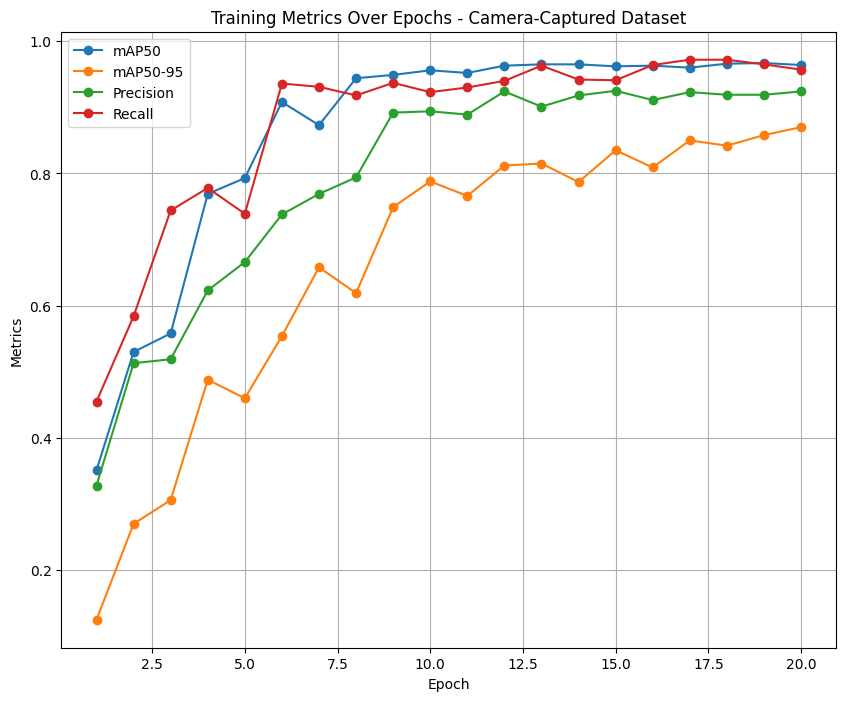

In [ ]:
# Combined plot for all metrics
plt.figure(figsize=(10, 8))

# Plot mAP50
plt.plot(epochs, mAP50, label='mAP50', marker='o')

# Plot mAP50-95
plt.plot(epochs, mAP50_95, label='mAP50-95', marker='o')

# Plot Precision
plt.plot(epochs, precision, label='Precision', marker='o')

# Plot Recall
plt.plot(epochs, recall, label='Recall', marker='o')

# Add titles and labels
plt.title('Training Metrics Over Epochs - Camera-Captured Dataset')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the combined plot
plt.show()


In [ ]:
!python yolov5/detect.py --weights yolov5/best.pt --img 416 --conf 0.2 --source /content/datasets/ArucoCodeDetection2-1/test/images --save-txt


detect: weights=['yolov5/best.pt'], source=/content/datasets/ArucoCodeDetection2-1/test/images, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/68 /content/datasets/ArucoCodeDetection2-1/test/images/frame_100_jpg.rf.e8fc012cb3a85fc830b2cda842f1b096.jpg: 416x416 1 Aruco Marker, 1 Human, 1 VR Headset, 7.1ms
image 2/68 /content/datasets/ArucoCodeDetection2-1/test/images/frame_101_jpg.rf.420da751

Precision-Recall Curve

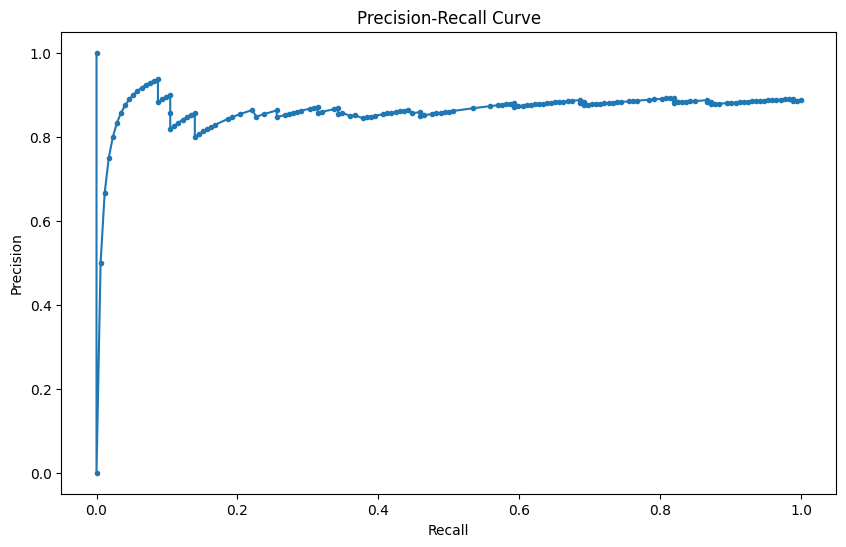

In [ ]:
import glob
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Load ground truth and predicted labels
gt_dir = 'datasets/ArucoCodeDetection2-1/test/labels/'
pred_dir = 'yolov5/runs/detect/exp3/labels/'

gt_files = glob.glob(os.path.join(gt_dir, '*.txt'))

# Initialize variables to calculate TP, FP, FN for PR curve and confusion matrix
true_labels = []
score_values = []

def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip().split() for line in f.readlines()]
        return [(int(label[0]), float(label[1]), [float(x) for x in label[2:]]) for label in labels]


def calculate_iou(box1, box2):
    # Convert bounding boxes from (center x, center y, width) to (x1, y1, x2, y2)
    x1_min = box1[0] - box1[2] / 2
    y1_min = box1[1] - box1[2] / 2
    x1_max = box1[0] + box1[2] / 2
    y1_max = box1[1] + box1[2] / 2

    x2_min = box2[0] - box2[2] / 2
    y2_min = box2[1] - box2[2] / 2
    x2_max = box2[0] + box2[2] / 2
    y2_max = box2[1] + box2[2] / 2


    # Calculate the intersection area
    inter_area = max(0, min(x1_max, x2_max) - max(x1_min, x2_min)) * max(0, min(y1_max, y2_max) - max(y1_min, y2_min))
    # Calculate the union area
    union_area = (x1_max - x1_min) * (y1_max - y1_min) + (x2_max - x2_min) * (y2_max - y2_min) - inter_area

    return inter_area / union_area if union_area else 0

for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates
        score = pred_label[1]

        matched = False
        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates

            if calculate_iou(gt_box, pred_box) >= 0.5:
                true_labels.append(1)  # True positive
                matched = True
                break

        if not matched:
            true_labels.append(0)  # False positive

        score_values.append(score)



# Calculate precision and recall for PR curve
precision, recall, thresholds = precision_recall_curve(true_labels, score_values)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [ ]:
# Initialize variables for TP, FP, FN
tp, fp, fn = 0, 0, 0

for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    matched_gt = set()  # Track which ground truth labels are matched

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates
        score = pred_label[1]

        matched = False
        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates

            if calculate_iou(gt_box, pred_box) >= 0.5:
                tp += 1  # True positive
                # Convert bounding box coordinates in gt_label to tuple before adding
                matched_gt.add((gt_label[0], gt_label[1], tuple(gt_label[2])))
                matched = True
                break

        if not matched:
            fp += 1  # False positive

    # Calculate false negatives (missed ground truth)
    fn += len(gt_labels) - len(matched_gt)  # Subtract matched ground truths from total

# Calculate precision, recall, and F1 score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")


Precision: 0.8865979381443299, Recall: 0.9608938547486033, F1 Score: 0.9222520107238605


IOU

In [ ]:
# Initialize variables for TP, FP, FN
tp, fp, fn = 0, 0, 0

for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    matched_gt = set()  # Track which ground truth labels are matched

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates
        score = pred_label[1]

        matched = False
        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates

            if calculate_iou(gt_box, pred_box) >= 0.5:
                tp += 1  # True positive
                # Convert bounding box coordinates in gt_label to tuple before adding
                matched_gt.add((gt_label[0], gt_label[1], tuple(gt_label[2])))
                matched = True
                break

        if not matched:
            fp += 1  # False positive

    # Calculate false negatives (missed ground truth)
    fn += len(gt_labels) - len(matched_gt)  # Subtract matched ground truths from total

# Calculate precision, recall, and F1 score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")


Precision: 0.8865979381443299, Recall: 0.9608938547486033, F1 Score: 0.9222520107238605


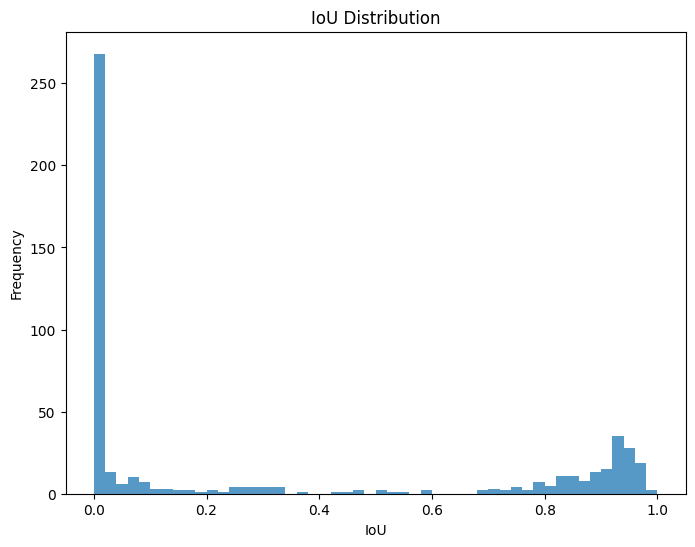

In [ ]:
# Calculate IoU values
ious = []
for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates

        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates
            iou = calculate_iou(gt_box, pred_box)
            ious.append(iou)

# Plot IoU Distribution
plt.figure(figsize=(8, 6))
plt.hist(ious, bins=50, range=(0, 1), alpha=0.75)
plt.title('IoU Distribution')
plt.xlabel('IoU')
plt.ylabel('Frequency')
plt.show()